<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%94%D0%97_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
df.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [4]:
df = df.rename(columns = {'text_type':'labels','text':'data'})

In [5]:
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk.stem import PorterStemmer

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
X = df["data"]
y = df["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)

In [8]:
stemmer = PorterStemmer()

In [9]:
class MyTokenizer:
  def __init__(self):
    self.stemmer = PorterStemmer()
  def __call__(self, text):
    tokens = text.split()

    stemmed_tokens = [self.stemmer.stem(token) for token in tokens]

    return stemmed_tokens

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

In [11]:
X_train.shape

(4069, 21064)

In [12]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(4069)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [14]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 1)

(array([4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060,
        4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068]),)

In [15]:
(X_train == 0).sum()

24539

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [17]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.92      0.94     11470
        spam       0.83      0.90      0.87      4809

    accuracy                           0.92     16279
   macro avg       0.90      0.91      0.90     16279
weighted avg       0.92      0.92      0.92     16279



[]

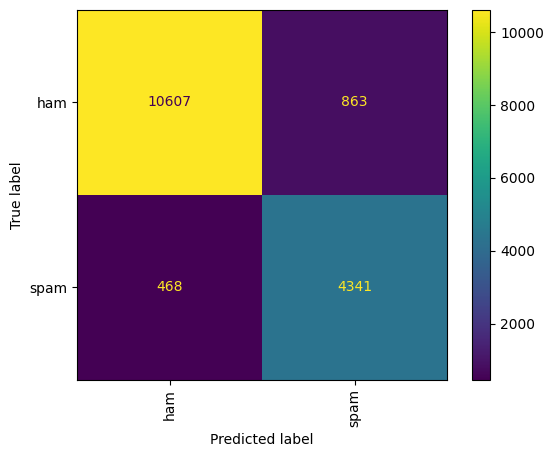

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [19]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.96      0.95     11470
        spam       0.90      0.85      0.87      4809

    accuracy                           0.93     16279
   macro avg       0.92      0.90      0.91     16279
weighted avg       0.93      0.93      0.93     16279



[]

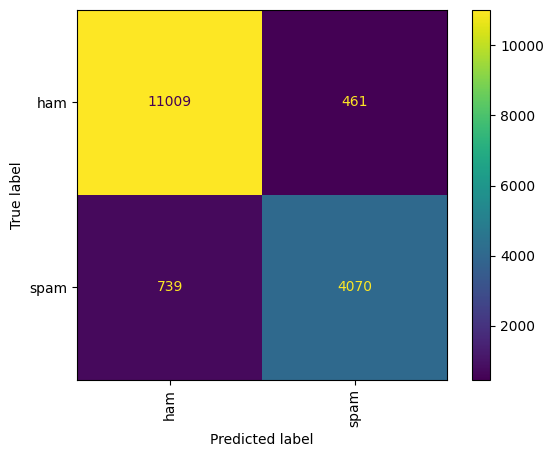

In [21]:
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()


[]

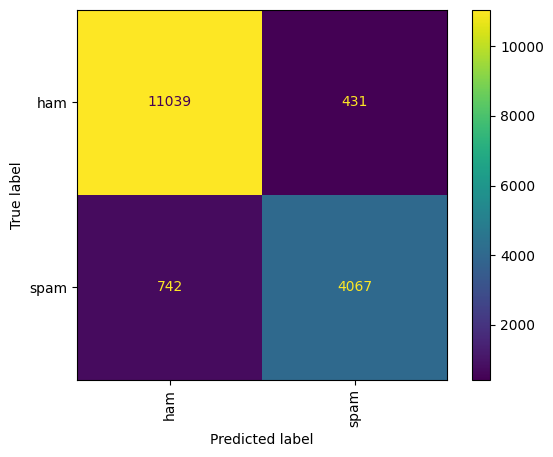

In [22]:
from sklearn import svm
model = svm.SVC(kernel='rbf', class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()